In [1]:
import sys
sys.path.append('../Utils/')

from IOUtils_v1 import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
import re

%matplotlib inline
%load_ext autoreload
%autoreload 2

def ternary (n, l):
    if n == 0:
        return '0'*l
    nums = []
    while n:
        n, r = divmod(n, 3)
        nums.append(str(r))
    return ('0'*(l-len(nums))) + ''.join(reversed(nums))

def sequence_freq(tick_sequence, n):
    sequence_dict = {ternary(k, n): len(re.findall(r"(?={0})".format(ternary(k, n)), tick_sequence)) for k in range(3**n)}
    sequence_freq = pd.DataFrame(list(sequence_dict.items()), columns = ['sequence', 'freq'])
    sequence_freq['prior'] = sequence_freq['sequence'].str.slice(0, n-1)
    sequence_freq['move'] = sequence_freq['sequence'].str.slice(n-1, n)
    sequence_freq = sequence_freq.pivot(index = 'prior', columns = 'move', values = 'freq')
    sequence_freq['total'] = sequence_freq['0'] + sequence_freq['1'] + sequence_freq['2']
    sequence_freq['max'] = sequence_freq.loc[:, '0':'2'].idxmax(axis = 1)
    sequence_freq['max_pct'] = sequence_freq.loc[:, '0':'2'].max(axis = 1)/sequence_freq['total']
    sequence_freq['prior'] = 'p'+sequence_freq.index.map(str)
    return sequence_freq

# Word Library

## Ru

### Ru1611 - 1min

In [3]:
instrument = 'ru1611*'
symbol = 'ru'
top_path = '../data/ru/'

freq = '1min'
output_path = './Output/'

tick_day = df_reader(instrument, topdir= top_path+'day', freq=freq, day=True, symbol=symbol).get_tick(raw=False)
tick_night = df_reader(instrument, topdir= top_path+'night', freq=freq, day=False, symbol=symbol).get_tick(raw=False)


tick_all = pd.concat([tick_day, tick_night], axis=0).sort_index()

['20160104']
['20160105']
['20160106']
['20160107']
['20160108']
['20160111']
['20160112']
['20160113']
['20160114']
['20160115']
['20160118']
['20160119']
['20160120']
['20160121']
['20160122']
['20160125']
['20160126']
['20160127']
['20160128']
['20160129']
['20160201']
['20160202']
['20160203']
['20160204']
['20160205']
['20160215']
['20160216']
['20160217']
['20160218']
['20160219']
['20160222']
['20160223']
['20160224']
['20160225']
['20160226']
['20160229']
['20160301']
['20160302']
['20160303']
['20160304']
['20160307']
['20160308']
['20160309']
['20160310']
['20160311']
['20160314']
['20160315']
['20160316']
['20160317']
['20160318']
['20160321']
['20160322']
['20160323']
['20160324']
['20160325']
['20160328']
['20160329']
['20160330']
['20160331']
['20160401']
['20160405']
['20160406']
['20160407']
['20160408']
['20160411']
['20160412']
['20160413']
['20160414']
['20160415']
['20160418']
['20160419']
['20160420']
['20160421']
['20160422']
['20160425']
['20160426']
['20160427']

In [4]:
tick_all.head()

,InstrumentID,Date,TimeStamp,LastPrice,HighPrice,LowPrice,Volume,Turnover,AccVolume,AccTurnover,...,BidVolume1,BidVolume2,BidVolume3,BidVolume4,BidVolume5,Type,AveragePrice,UpperLimitPrice,LowerLimitPrice,UpdateTime
2016-01-04 09:00:00,ru1611,20160104.0,1.451869e+12,10430.0,10430.0,10430.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,-1.0,0.0,11085.0,9830.0,08:59:00.500
2016-01-04 09:01:00,ru1611,20160104.0,1.451869e+12,10430.0,10430.0,10430.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,-1.0,0.0,11085.0,9830.0,09:00:59.500
2016-01-04 09:02:00,ru1611,20160104.0,1.451869e+12,10430.0,10430.0,10430.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,-1.0,0.0,11085.0,9830.0,09:01:53.000
2016-01-04 09:03:00,ru1611,20160104.0,1.451869e+12,10430.0,10430.0,10430.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,-1.0,0.0,11085.0,9830.0,09:03:00.000
2016-01-04 09:04:00,ru1611,20160104.0,1.451869e+12,10430.0,10430.0,10430.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,-1.0,0.0,11085.0,9830.0,09:03:53.000


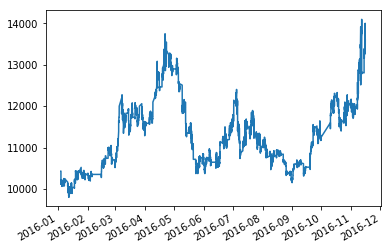

In [5]:
tick_all.LastPrice.plot()

In [15]:
tick_all['PriceChange'] = tick_all['LastPrice'].pct_change()
tick_all['Direction'] = tick_all['PriceChange'].apply(lambda x: 2 if x > 0 else (1 if x < 0 else 0))
Tick_Change_Sequence = tick_all['Direction'].astype(str).str.cat()
tick_all.shape

(111495, 39)

In [16]:
sequence_freq_all = pd.DataFrame()
for n in np.arange(2, 8):
    tmp = sequence_freq(Tick_Change_Sequence, n)
    sequence_freq_all = sequence_freq_all.append(tmp)
sequence_freq_all.to_csv(output_path+'_'.join([instrument.strip('*'), freq])+'.csv', index=False)

### Ru1611 - 5min

['20160104']
['20160105']
['20160106']
['20160107']
['20160108']
['20160111']
['20160112']
['20160113']
['20160114']
['20160115']
['20160118']
['20160119']
['20160120']
['20160121']
['20160122']
['20160125']
['20160126']
['20160127']
['20160128']
['20160129']
['20160201']
['20160202']
['20160203']
['20160204']
['20160205']
['20160215']
['20160216']
['20160217']
['20160218']
['20160219']
['20160222']
['20160223']
['20160224']
['20160225']
['20160226']
['20160229']
['20160301']
['20160302']
['20160303']
['20160304']
['20160307']
['20160308']
['20160309']
['20160310']
['20160311']
['20160314']
['20160315']
['20160316']
['20160317']
['20160318']
['20160321']
['20160322']
['20160323']
['20160324']
['20160325']
['20160328']
['20160329']
['20160330']
['20160331']
['20160401']
['20160405']
['20160406']
['20160407']
['20160408']
['20160411']
['20160412']
['20160413']
['20160414']
['20160415']
['20160418']
['20160419']
['20160420']
['20160421']
['20160422']
['20160425']
['20160426']
['20160427']

(22606, 39)

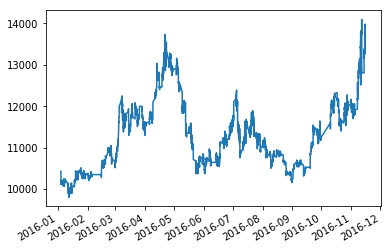

In [17]:
instrument = 'ru1611*'
symbol = 'ru'
top_path = '../data/ru/'

freq = '5min'
output_path = './Output/'

tick_day = df_reader(instrument, topdir= top_path+'day', freq=freq, day=True, symbol=symbol).get_tick(raw=False)
tick_night = df_reader(instrument, topdir= top_path+'night', freq=freq, day=False, symbol=symbol).get_tick(raw=False)


tick_all = pd.concat([tick_day, tick_night], axis=0).sort_index()

tick_all.LastPrice.plot()

tick_all['PriceChange'] = tick_all['LastPrice'].pct_change()
tick_all['Direction'] = tick_all['PriceChange'].apply(lambda x: 2 if x > 0 else (1 if x < 0 else 0))
Tick_Change_Sequence = tick_all['Direction'].astype(str).str.cat()
tick_all.shape

In [18]:
sequence_freq_all = pd.DataFrame()
for n in np.arange(2, 8):
    tmp = sequence_freq(Tick_Change_Sequence, n)
    sequence_freq_all = sequence_freq_all.append(tmp)
sequence_freq_all.to_csv(output_path+'_'.join([instrument.strip('*'), freq])+'.csv', index=False)

## Ru1701 - 1min

['20160118']
['20160119']
['20160120']
['20160121']
['20160122']
['20160125']
['20160126']
['20160127']
['20160128']
['20160129']
['20160201']
['20160202']
['20160203']
['20160204']
['20160205']
['20160215']
['20160216']
['20160217']
['20160218']
['20160219']
['20160222']
['20160223']
['20160224']
['20160225']
['20160226']
['20160229']
['20160301']
['20160302']
['20160303']
['20160304']
['20160307']
['20160308']
['20160309']
['20160310']
['20160311']
['20160314']
['20160315']
['20160316']
['20160317']
['20160318']
['20160321']
['20160322']
['20160323']
['20160324']
['20160325']
['20160328']
['20160329']
['20160330']
['20160331']
['20160401']
['20160405']
['20160406']
['20160407']
['20160408']
['20160411']
['20160412']
['20160413']
['20160414']
['20160415']
['20160418']
['20160419']
['20160420']
['20160421']
['20160422']
['20160425']
['20160426']
['20160427']
['20160428']
['20160429']
['20160503']
['20160504']
['20160505']
['20160506']
['20160509']
['20160510']
['20160511']
['20160512']

(245268, 39)

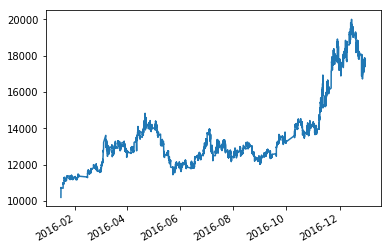

In [6]:
instrument = 'ru1701*'
symbol = 'ru'
top_path = '../data/ru/'

freq = '1min'
output_path = './Output/'

tick_day = df_reader(instrument, topdir= top_path+'day', freq=freq, day=True, symbol=symbol).get_tick(raw=False)
tick_night = df_reader(instrument, topdir= top_path+'night', freq=freq, day=False, symbol=symbol).get_tick(raw=False)


tick_all = pd.concat([tick_day, tick_night], axis=0).sort_index()

tick_all.LastPrice.plot()

tick_all['PriceChange'] = tick_all['LastPrice'].pct_change()
tick_all['Direction'] = tick_all['PriceChange'].apply(lambda x: 2 if x > 0 else (1 if x < 0 else 0))
Tick_Change_Sequence = tick_all['Direction'].astype(str).str.cat()
tick_all.shape

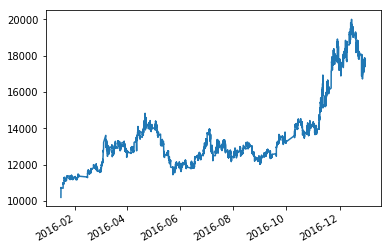

In [8]:
tick_all.LastPrice.plot()

In [20]:
sequence_freq_all = pd.DataFrame()
for n in np.arange(2, 8):
    tmp = sequence_freq(Tick_Change_Sequence, n)
    sequence_freq_all = sequence_freq_all.append(tmp)
sequence_freq_all.to_csv(output_path+'_'.join([instrument.strip('*'), freq])+'.csv', index=False)

## Ru1701 - 5min

['20160118']
['20160119']
['20160120']
['20160121']
['20160122']
['20160125']
['20160126']
['20160127']
['20160128']
['20160129']
['20160201']
['20160202']
['20160203']
['20160204']
['20160205']
['20160215']
['20160216']
['20160217']
['20160218']
['20160219']
['20160222']
['20160223']
['20160224']
['20160225']
['20160226']
['20160229']
['20160301']
['20160302']
['20160303']
['20160304']
['20160307']
['20160308']
['20160309']
['20160310']
['20160311']
['20160314']
['20160315']
['20160316']
['20160317']
['20160318']
['20160321']
['20160322']
['20160323']
['20160324']
['20160325']
['20160328']
['20160329']
['20160330']
['20160331']
['20160401']
['20160405']
['20160406']
['20160407']
['20160408']
['20160411']
['20160412']
['20160413']
['20160414']
['20160415']
['20160418']
['20160419']
['20160420']
['20160421']
['20160422']
['20160425']
['20160426']
['20160427']
['20160428']
['20160429']
['20160503']
['20160504']
['20160505']
['20160506']
['20160509']
['20160510']
['20160511']
['20160512']

(49428, 39)

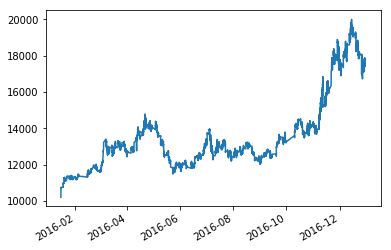

In [21]:
instrument = 'ru1701*'
symbol = 'ru'
top_path = '../data/ru/'

freq = '5min'
output_path = './Output/'

tick_day = df_reader(instrument, topdir= top_path+'day', freq=freq, day=True, symbol=symbol).get_tick(raw=False)
tick_night = df_reader(instrument, topdir= top_path+'night', freq=freq, day=False, symbol=symbol).get_tick(raw=False)


tick_all = pd.concat([tick_day, tick_night], axis=0).sort_index()

tick_all.LastPrice.plot()

tick_all['PriceChange'] = tick_all['LastPrice'].pct_change()
tick_all['Direction'] = tick_all['PriceChange'].apply(lambda x: 2 if x > 0 else (1 if x < 0 else 0))
Tick_Change_Sequence = tick_all['Direction'].astype(str).str.cat()
tick_all.shape

In [22]:
sequence_freq_all = pd.DataFrame()
for n in np.arange(2, 8):
    tmp = sequence_freq(Tick_Change_Sequence, n)
    sequence_freq_all = sequence_freq_all.append(tmp)
sequence_freq_all.to_csv(output_path+'_'.join([instrument.strip('*'), freq])+'.csv', index=False)

## Zn
### Zn1612 - 1min

In [23]:
instrument = 'zn1612*'
symbol = 'Zn'
top_path = '../data/zn/'

freq = '1min'
output_path = './Output/'

tick_day = df_reader(instrument, topdir= top_path+'day', freq=freq, day=True, symbol=symbol).get_tick(raw=False)
tick_night = df_reader(instrument, topdir= top_path+'night', freq=freq, day=False, symbol=symbol).get_tick(raw=False)


tick_all = pd.concat([tick_day, tick_night], axis=0).sort_index()

['20160104']
['20160105']
['20160106']
['20160107']
['20160108']
['20160111']
['20160112']
['20160113']
['20160114']
['20160115']
['20160118']
['20160119']
['20160120']
['20160121']
['20160122']
['20160125']
['20160126']
['20160127']
['20160128']
['20160129']
['20160201']
['20160202']
['20160203']
['20160204']
['20160205']
['20160215']
['20160216']
['20160217']
['20160218']
['20160219']
['20160222']
['20160223']
['20160224']
['20160225']
['20160226']
['20160229']
['20160301']
['20160302']
['20160303']
['20160304']
['20160307']
['20160308']
['20160309']
['20160310']
['20160311']
['20160314']
['20160315']
['20160316']
['20160317']
['20160318']
['20160321']
['20160322']
['20160323']
['20160324']
['20160325']
['20160328']
['20160329']
['20160330']
['20160331']
['20160401']
['20160405']
['20160406']
['20160407']
['20160408']
['20160411']
['20160412']
['20160413']
['20160414']
['20160415']
['20160418']
['20160419']
['20160420']
['20160421']
['20160422']
['20160425']
['20160426']
['20160427']

['20161114', '20161115']
['20161115', '20161116']
['20161116', '20161117']
['20161117', '20161118']
['20161118', '20161119']
['20161121', '20161122']
['20161122', '20161123']
['20161123', '20161124']
['20161124', '20161125']
['20161125', '20161126', '20161128']
['20161128', '20161129']
['20161129', '20161130']
['20161130', '20161201']
['20161201', '20161202']
['20161202', '20161203']
['20161205', '20161206']
['20161206', '20161207']
['20161207', '20161208']
['20161208', '20161209']
['20161209', '20161210']
['20161212', '20161213']
['20161213', '20161214']
['20161214', '20161215']


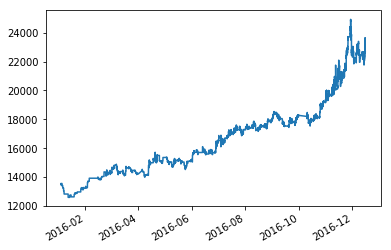

In [24]:
tick_all.LastPrice.plot()

In [25]:
tick_all['PriceChange'] = tick_all['LastPrice'].pct_change()
tick_all['Direction'] = tick_all['PriceChange'].apply(lambda x: 2 if x > 0 else (1 if x < 0 else 0))
Tick_Change_Sequence = tick_all['Direction'].astype(str).str.cat()
tick_all.shape

(136425, 39)

In [26]:
sequence_freq_all = pd.DataFrame()
for n in np.arange(2, 8):
    tmp = sequence_freq(Tick_Change_Sequence, n)
    sequence_freq_all = sequence_freq_all.append(tmp)
sequence_freq_all.to_csv(output_path+'_'.join([instrument.strip('*'), freq])+'.csv', index=False)

### Zn1612 - 5min

['20160104']
['20160105']
['20160106']
['20160107']
['20160108']
['20160111']
['20160112']
['20160113']
['20160114']
['20160115']
['20160118']
['20160119']
['20160120']
['20160121']
['20160122']
['20160125']
['20160126']
['20160127']
['20160128']
['20160129']
['20160201']
['20160202']
['20160203']
['20160204']
['20160205']
['20160215']
['20160216']
['20160217']
['20160218']
['20160219']
['20160222']
['20160223']
['20160224']
['20160225']
['20160226']
['20160229']
['20160301']
['20160302']
['20160303']
['20160304']
['20160307']
['20160308']
['20160309']
['20160310']
['20160311']
['20160314']
['20160315']
['20160316']
['20160317']
['20160318']
['20160321']
['20160322']
['20160323']
['20160324']
['20160325']
['20160328']
['20160329']
['20160330']
['20160331']
['20160401']
['20160405']
['20160406']
['20160407']
['20160408']
['20160411']
['20160412']
['20160413']
['20160414']
['20160415']
['20160418']
['20160419']
['20160420']
['20160421']
['20160422']
['20160425']
['20160426']
['20160427']

['20161114', '20161115']
['20161115', '20161116']
['20161116', '20161117']
['20161117', '20161118']
['20161118', '20161119']
['20161121', '20161122']
['20161122', '20161123']
['20161123', '20161124']
['20161124', '20161125']
['20161125', '20161126', '20161128']
['20161128', '20161129']
['20161129', '20161130']
['20161130', '20161201']
['20161201', '20161202']
['20161202', '20161203']
['20161205', '20161206']
['20161206', '20161207']
['20161207', '20161208']
['20161208', '20161209']
['20161209', '20161210']
['20161212', '20161213']
['20161213', '20161214']
['20161214', '20161215']


(27589, 39)

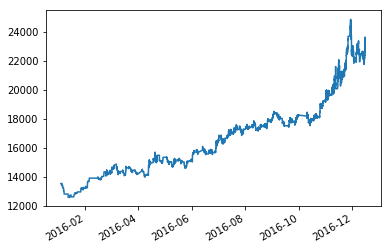

In [27]:
instrument = 'zn1612*'
symbol = 'zn'
top_path = '../data/zn/'

freq = '5min'
output_path = './Output/'

tick_day = df_reader(instrument, topdir= top_path+'day', freq=freq, day=True, symbol=symbol).get_tick(raw=False)
tick_night = df_reader(instrument, topdir= top_path+'night', freq=freq, day=False, symbol=symbol).get_tick(raw=False)


tick_all = pd.concat([tick_day, tick_night], axis=0).sort_index()

tick_all.LastPrice.plot()

tick_all['PriceChange'] = tick_all['LastPrice'].pct_change()
tick_all['Direction'] = tick_all['PriceChange'].apply(lambda x: 2 if x > 0 else (1 if x < 0 else 0))
Tick_Change_Sequence = tick_all['Direction'].astype(str).str.cat()
tick_all.shape

In [28]:
sequence_freq_all = pd.DataFrame()
for n in np.arange(2, 8):
    tmp = sequence_freq(Tick_Change_Sequence, n)
    sequence_freq_all = sequence_freq_all.append(tmp)
sequence_freq_all.to_csv(output_path+'_'.join([instrument.strip('*'), freq])+'.csv', index=False)

### Zn1701 - 1min

['20160118']
['20160119']
['20160120']
['20160121']
['20160122']
['20160125']
['20160126']
['20160127']
['20160128']
['20160129']
['20160201']
['20160202']
['20160203']
['20160204']
['20160205']
['20160215']
['20160216']
['20160217']
['20160218']
['20160219']
['20160222']
['20160223']
['20160224']
['20160225']
['20160226']
['20160229']
['20160301']
['20160302']
['20160303']
['20160304']
['20160307']
['20160308']
['20160309']
['20160310']
['20160311']
['20160314']
['20160315']
['20160316']
['20160317']
['20160318']
['20160321']
['20160322']
['20160323']
['20160324']
['20160325']
['20160328']
['20160329']
['20160330']
['20160331']
['20160401']
['20160405']
['20160406']
['20160407']
['20160408']
['20160411']
['20160412']
['20160413']
['20160414']
['20160415']
['20160418']
['20160419']
['20160420']
['20160421']
['20160422']
['20160425']
['20160426']
['20160427']
['20160428']
['20160429']
['20160503']
['20160504']
['20160505']
['20160506']
['20160509']
['20160510']
['20160511']
['20160512']

['20161125', '20161126', '20161128']
['20161128', '20161129']
['20161129', '20161130']
['20161130', '20161201']
['20161201', '20161202']
['20161202', '20161203', '20161205']
['20161205', '20161206']
['20161206', '20161207']
['20161207', '20161208']
['20161208', '20161209']
['20161209', '20161210', '20161212']
['20161212', '20161213']
['20161213', '20161214']
['20161214', '20161215']
['20161215', '20161216']
['20161216', '20161217']
['20161219', '20161220']
['20161220', '20161221']
['20161221', '20161222']
['20161222', '20161223']
['20161223', '20161224']
['20161226', '20161227']
['20161227', '20161228']
['20161228', '20161229']
['20161229', '20161230']


(140126, 39)

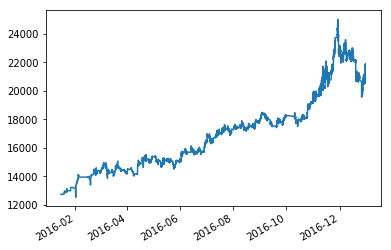

In [2]:
instrument = 'zn1701*'
symbol = 'Zn'
top_path = '../data/zn/'

freq = '1min'
output_path = './Output/'

tick_day = df_reader(instrument, topdir= top_path+'day', freq=freq, day=True, symbol=symbol).get_tick(raw=False)
tick_night = df_reader(instrument, topdir= top_path+'night', freq=freq, day=False, symbol=symbol).get_tick(raw=False)


tick_all = pd.concat([tick_day, tick_night], axis=0).sort_index()

tick_all.LastPrice.plot()

tick_all['PriceChange'] = tick_all['LastPrice'].pct_change()
tick_all['Direction'] = tick_all['PriceChange'].apply(lambda x: 2 if x > 0 else (1 if x < 0 else 0))
Tick_Change_Sequence = tick_all['Direction'].astype(str).str.cat()
tick_all.shape

In [34]:
sequence_freq_all = pd.DataFrame()
for n in np.arange(2, 8):
    tmp = sequence_freq(Tick_Change_Sequence, n)
    sequence_freq_all = sequence_freq_all.append(tmp)
sequence_freq_all.to_csv(output_path+'_'.join([instrument.strip('*'), freq])+'.csv', index=False)

In [35]:
sequence_freq_1 = pd.DataFrame()
sequence_freq_2 = pd.DataFrame()
sequence_freq_3 = pd.DataFrame()

hist_len = int(len(Tick_Change_Sequence)*0.6)
model_sel_len = int(len(Tick_Change_Sequence)*0.8)
# 60% used for building word freq table
Tick_Change_Sequence_1 = Tick_Change_Sequence[0:hist_len]
# 20% used for model selection
Tick_Change_Sequence_2 = Tick_Change_Sequence[hist_len+1:model_sel_len]
#20% for validation
Tick_Change_Sequence_3 = Tick_Change_Sequence[model_sel_len+1:len(Tick_Change_Sequence)]

for n in np.arange(2, 8):
    tmp = sequence_freq(Tick_Change_Sequence_1, n)
    sequence_freq_1 = sequence_freq_1.append(tmp)
sequence_freq_1.to_csv(output_path+'_'.join([instrument.strip('*'), freq])+'_1.csv', index=False)

for n in np.arange(2, 8):
    tmp = sequence_freq(Tick_Change_Sequence_2, n)
    sequence_freq_2 = sequence_freq_2.append(tmp)
sequence_freq_2.to_csv(output_path+'_'.join([instrument.strip('*'), freq])+'_2.csv', index=False)

for n in np.arange(2, 8):
    tmp = sequence_freq(Tick_Change_Sequence_3, n)
    sequence_freq_3 = sequence_freq_3.append(tmp)
sequence_freq_3.to_csv(output_path+'_'.join([instrument.strip('*'), freq])+'_3.csv', index=False)





In [43]:
tick_all.head()

,InstrumentID,Date,TimeStamp,LastPrice,HighPrice,LowPrice,Volume,Turnover,AccVolume,AccTurnover,...,BidVolume3,BidVolume4,BidVolume5,Type,AveragePrice,UpperLimitPrice,LowerLimitPrice,UpdateTime,PriceChange,Direction
2016-01-15 21:00:00,zn1701,20160115.0,1.452863e+12,12735.0,12735.0,12735.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-1.0,0.0,14005.0,11460.0,20:59:00.500,NaN,0
2016-01-15 21:01:00,zn1701,20160115.0,1.452863e+12,12735.0,12735.0,12735.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-1.0,0.0,14005.0,11460.0,21:00:28.500,0.0,0
2016-01-15 21:02:00,zn1701,20160115.0,1.452863e+12,12735.0,12735.0,12735.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-1.0,0.0,14005.0,11460.0,21:01:14.500,0.0,0
2016-01-15 21:03:00,zn1701,20160115.0,1.452863e+12,12735.0,12735.0,12735.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-1.0,0.0,14005.0,11460.0,21:01:14.500,0.0,0
2016-01-15 21:04:00,zn1701,20160115.0,1.452863e+12,12735.0,12735.0,12735.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-1.0,0.0,14005.0,11460.0,21:01:14.500,0.0,0


In [49]:
store = pd.HDFStore(output_path+'_'.join([instrument.strip('*'), freq])+'.h5')
store['tick_all'] =  tick_all
store.close()

In [50]:
tick_all.to_csv(output_path+'_'.join([instrument.strip('*'), freq])+'_tickall.csv', index=False)

In [42]:
sequence_freq_70

move,0,1,2,total,max,max_pct,prior
prior,,,,,,,
0,72994,3659,3782,80435,0,0.907491,p0
1,3689,2192,2866,8747,0,0.421745,p1
2,3751,2896,2258,8905,0,0.421224,p2
00,68792,2037,2165,72994,0,0.942434,p00
01,1999,749,911,3659,0,0.546324,p01
02,2049,924,809,3782,0,0.541777,p02
10,2099,711,879,3689,0,0.568989,p10
11,684,593,915,2192,2,0.417427,p11
12,959,1063,843,2865,1,0.371030,p12


### Zn1701 - 5min

['20160118']
['20160119']
['20160120']
['20160121']
['20160122']
['20160125']
['20160126']
['20160127']
['20160128']
['20160129']
['20160201']
['20160202']
['20160203']
['20160204']
['20160205']
['20160215']
['20160216']
['20160217']
['20160218']
['20160219']
['20160222']
['20160223']
['20160224']
['20160225']
['20160226']
['20160229']
['20160301']
['20160302']
['20160303']
['20160304']
['20160307']
['20160308']
['20160309']
['20160310']
['20160311']
['20160314']
['20160315']
['20160316']
['20160317']
['20160318']
['20160321']
['20160322']
['20160323']
['20160324']
['20160325']
['20160328']
['20160329']
['20160330']
['20160331']
['20160401']
['20160405']
['20160406']
['20160407']
['20160408']
['20160411']
['20160412']
['20160413']
['20160414']
['20160415']
['20160418']
['20160419']
['20160420']
['20160421']
['20160422']
['20160425']
['20160426']
['20160427']
['20160428']
['20160429']
['20160503']
['20160504']
['20160505']
['20160506']
['20160509']
['20160510']
['20160511']
['20160512']

['20161125', '20161126', '20161128']
['20161128', '20161129']
['20161129', '20161130']
['20161130', '20161201']
['20161201', '20161202']
['20161202', '20161203', '20161205']
['20161205', '20161206']
['20161206', '20161207']
['20161207', '20161208']
['20161208', '20161209']
['20161209', '20161210', '20161212']
['20161212', '20161213']
['20161213', '20161214']
['20161214', '20161215']
['20161215', '20161216']
['20161216', '20161217']
['20161219', '20161220']
['20161220', '20161221']
['20161221', '20161222']
['20161222', '20161223']
['20161223', '20161224']
['20161226', '20161227']
['20161227', '20161228']
['20161228', '20161229']
['20161229', '20161230']


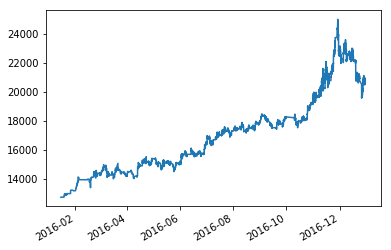

In [32]:
instrument = 'zn1701*'
symbol = 'Zn'
top_path = '../data/zn/'

freq = '5min'
output_path = './Output/'

tick_day = df_reader(instrument, topdir= top_path+'day', freq=freq, day=True, symbol=symbol).get_tick(raw=False)
tick_night = df_reader(instrument, topdir= top_path+'night', freq=freq, day=False, symbol=symbol).get_tick(raw=False)


tick_all = pd.concat([tick_day, tick_night], axis=0).sort_index()

tick_all.LastPrice.plot()

tick_all['PriceChange'] = tick_all['LastPrice'].pct_change()
tick_all['Direction'] = tick_all['PriceChange'].apply(lambda x: 2 if x > 0 else (1 if x < 0 else 0))
Tick_Change_Sequence = tick_all['Direction'].astype(str).str.cat()
tick_all.shape

sequence_freq_all = pd.DataFrame()
for n in np.arange(2, 8):
    tmp = sequence_freq(Tick_Change_Sequence, n)
    sequence_freq_all = sequence_freq_all.append(tmp)
sequence_freq_all.to_csv(output_path+'_'.join([instrument.strip('*'), freq])+'.csv', index=False)

## Todo:
1. Plot the change of word frequency as a function of string lenghs
3. Plot Time value
2. Check xgboost or other machine learning methods. Try to include all string?